In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis, skew
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading the dataset
file_path = '/content/cities_r2.csv'
cities = pd.read_csv(file_path)

# Displaying the first few rows of the dataset
print(cities.head())

  name_of_city  state_code      state_name  dist_code  population_total  \
0      Abohar            3          PUNJAB          9            145238   
1    Achalpur           27     MAHARASHTRA          7            112293   
2    Adilabad           28  ANDHRA PRADESH          1            117388   
3   Adityapur           20       JHARKHAND         24            173988   
4       Adoni           28  ANDHRA PRADESH         21            166537   

   population_male  population_female  0-6_population_total  \
0            76840              68398                 15870   
1            58256              54037                 11810   
2            59232              58156                 13103   
3            91495              82493                 23042   
4            82743              83794                 18406   

   0-6_population_male  0-6_population_female  ...  literates_female  \
0                 8587                   7283  ...             44972   
1                 6186    

In [3]:
# Function to calculate major moments
def calculate_statistical_moments(dataframe, column):
    """
    Calculates and displays major statistical moments for a given column.
    """
    data = dataframe[column]
    print(f"Statistical Moments for '{column}':")
    print(f"Mean: {data.mean():.2f}")
    print(f"Median: {data.median():.2f}")
    print(f"Standard Deviation: {data.std():.2f}")
    print(f"Skewness: {skew(data):.2f}")
    print(f"Kurtosis: {kurtosis(data):.2f}")
    print("\n")

# Selecting columns for statistical depth
columns_to_analyze = [
    "population_total",
    "effective_literacy_rate_total",
    "sex_ratio"
]

# Calculating moments for each column
for column in columns_to_analyze:
    calculate_statistical_moments(cities, column)

Statistical Moments for 'population_total':
Mean: 448112.37
Median: 184133.00
Standard Deviation: 1033227.59
Skewness: 7.59
Kurtosis: 69.93


Statistical Moments for 'effective_literacy_rate_total':
Mean: 85.13
Median: 85.97
Standard Deviation: 6.19
Skewness: -1.15
Kurtosis: 2.91


Statistical Moments for 'sex_ratio':
Mean: 930.29
Median: 922.00
Standard Deviation: 55.85
Skewness: 0.03
Kurtosis: 0.54




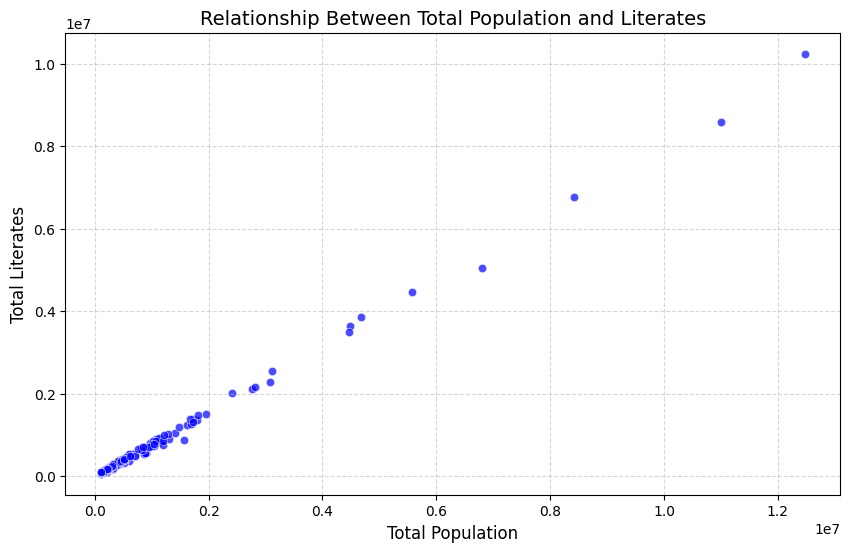

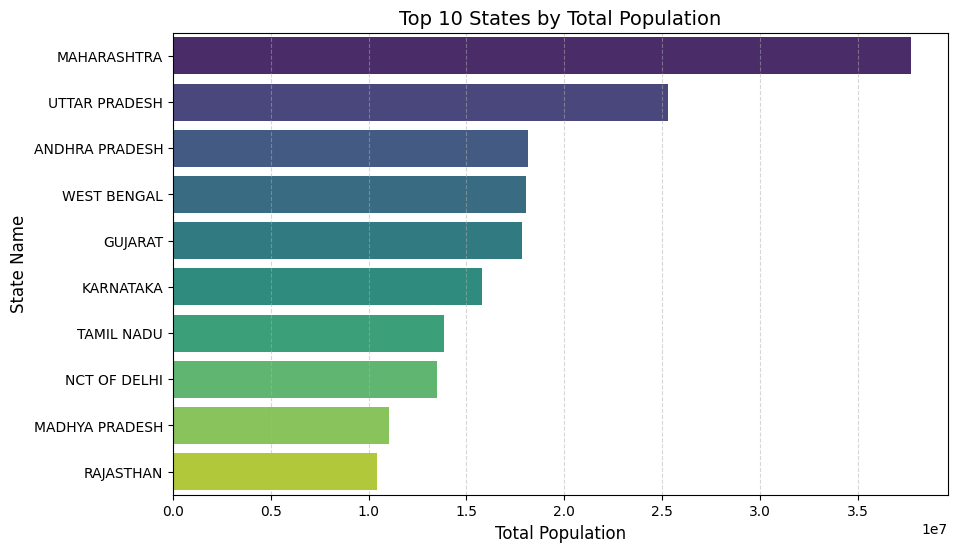

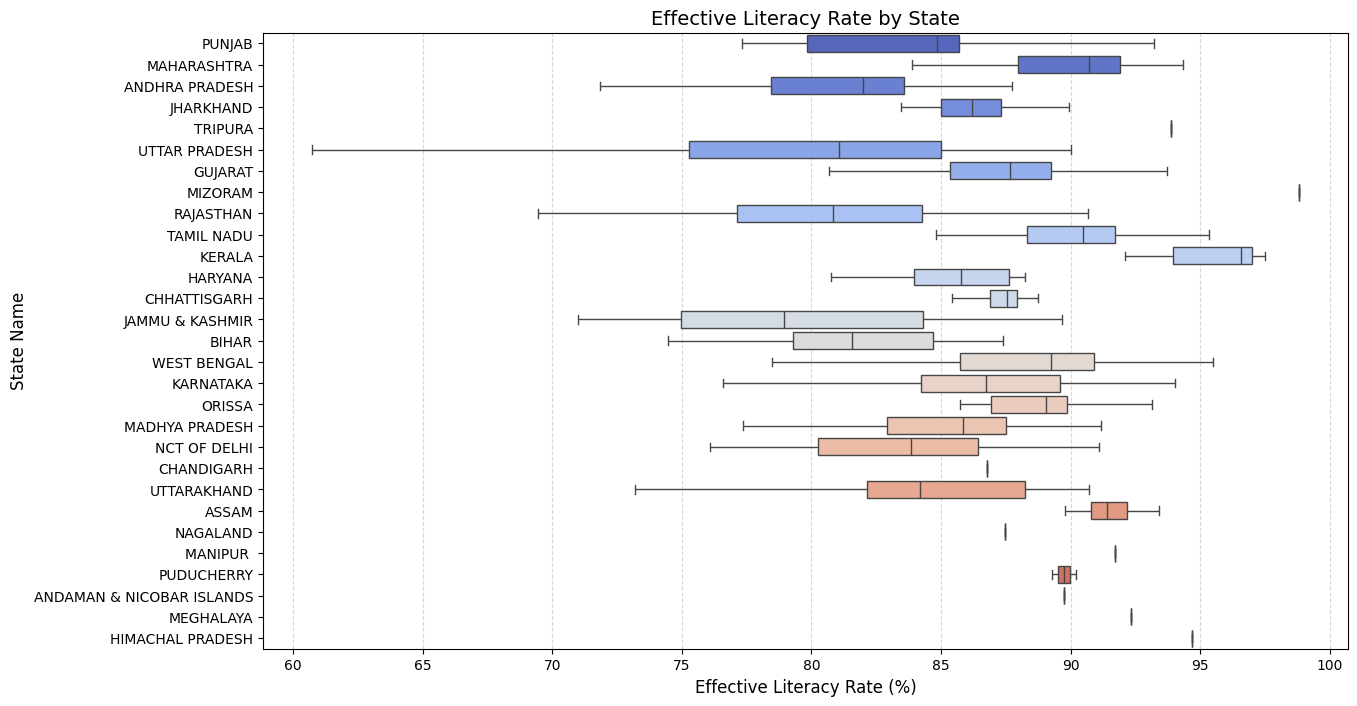

In [4]:
# Relational Graph Function
def plot_relational_graph(dataframe):
    """
    Creates a scatter plot to show the relationship between population_total and literates_total.
    """
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        x='population_total',
        y='literates_total',
        data=dataframe,
        alpha=0.7,
        color='blue'
    )
    plt.title('Relationship Between Total Population and Literates', fontsize=14)
    plt.xlabel('Total Population', fontsize=12)
    plt.ylabel('Total Literates', fontsize=12)
    plt.grid(visible=True, linestyle='--', alpha=0.5)
    plt.show()

# Categorical Graph Function
def plot_categorical_graph(dataframe):
    """
    Creates a bar plot comparing the population_total of the first few states.
    """
    top_states = dataframe.groupby('state_name')['population_total'].sum().sort_values(ascending=False).head(10)
    plt.figure(figsize=(10, 6))
    sns.barplot(
        x=top_states.values,
        y=top_states.index,
        palette='viridis'
    )
    plt.title('Top 10 States by Total Population', fontsize=14)
    plt.xlabel('Total Population', fontsize=12)
    plt.ylabel('State Name', fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.show()

# Statistical Graph Function
def plot_statistical_graph(dataframe):
    """
    Creates a boxplot showing effective literacy rates by state.
    """
    plt.figure(figsize=(14, 8))
    sns.boxplot(
        x='effective_literacy_rate_total',
        y='state_name',
        data=dataframe,
        palette='coolwarm',
        showfliers=False
    )
    plt.title('Effective Literacy Rate by State', fontsize=14)
    plt.xlabel('Effective Literacy Rate (%)', fontsize=12)
    plt.ylabel('State Name', fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.show()

# Calling the functions
plot_relational_graph(cities)
plot_categorical_graph(cities)
plot_statistical_graph(cities)